### Active Learning

In this section, we discuss two important problems in learning where logistic regression plays a supporting role. The concepts discussed here can be applied to other supervised classification algorithms as well. We start with the problem of active learning.

The main objective of active learning is to endow a learning algorithm with the ability to select which training samples to use and in what order. The expectation is that by doing so, the classifier will be able to deliver improved performance with a smaller number of labeled samples. This is particularly helpful in applications where it is costly to collect labeled data.

#### Labeled Data

Assume we have a collection of $N $ labeled data pairs $\{y^{(n)}, \mathbf{x}^{(n)}\}$. For simplicity, we assume two classes, $y^{(n)} \in \{ \pm1 \} $, although the discussion can be easily extended to multiclass problems.

Under active learning, the learner selects initially a random subset of $N_1 $ training samples, called the seed set. We refer to this set by the letter $S $, and denote the unused samples by $U $. The learner uses the samples in $S $ to train an initial classifier and obtain its parameters $(\mathbf{w}^*, w_0^*)$. This step can be carried out, for example, by using the stochastic gradient logistic regression algorithm with or without regularization.

To continue, the classifier will now query the other set, $U $, repeatedly to decide which of its samples to choose in order to continue to update the classifier $(\mathbf{w}^*, w_0^*)$. This procedure is known as pool-based sampling, which is one of the more popular schemes in active learning. The learner follows the following steps to carry out the query process:

**(a) Compute Confidence Levels and Uncertainties:**
For each feature $\mathbf{x} \in U$, the classifier evaluates the confidence level that it would have in assigning it to class $y = +1 $. We denote this confidence level by:

$$
p(n) = \frac{1}{1 + e^{- (\mathbf{x}^{(n)T} \mathbf{w}^* + w_0^*)}}
$$

Obviously, the confidence that the classifier has in assigning the same sample to the other class $y = -1 $ is $1 - p(n) $. We use the probabilities $\{p(n)\}$ to assess the level of uncertainty that we will have about the true label for $\mathbf{x}$. The uncertainty is computed by using the following entropy measure for the $n $-th sample:

$$
H(n) = -p(n) \log_2 p(n) - (1 - p(n)) \log_2 (1 - p(n))
$$

If the set $U $ is very large, it may become computationally demanding to evaluate these uncertainties for all feature vectors in it. Alternatively, we can sample a random subset of $U $ and only evaluate the confidence levels and entropy values for the features in this subset.

The following are two popular strategies to select the next sample from $U $ (or its subset) for use in training. They are referred to as uncertainty sampling procedures:

**Least Confidence:**
One strategy is to select the sample $\mathbf{x}^{(no)}$ for which the learner is least confident about its class, i.e., the one for which $p(n) $ is closest to 0.5:

$$
no = \arg \min_{n \in U} \left| 0.5 - p(n) \right|
$$
Note that we are not selecting the sample with the smallest likelihood value, but rather the sample whose likelihood is closest to 0.5.

**Most Uncertainty:**
A related strategy is to select the sample $\mathbf{x}^{(no)}$ with the highest entropy value (i.e., the sample for which the algorithm is less certain about its class):
$$
no = \arg \max_{n \in U} H(n)
$$
Under binary classification, this criterion is similar to the least confidence strategy because the entropy measure attains its maximum when $p(n) = 1/2 $. For both cases of least confidence and most uncertainty, and under mini-batch implementations, the classifier would query $U $ to select $B $ samples at once by choosing the $B $ samples with the smallest confidence or largest entropy values.

**(b) Update the Classifier:**
Once a new training sample $(y^{(no)}, \mathbf{x}^{(no)})$ has been selected, the learner updates its parameters $(\mathbf{w}^*, w_0^*)$ and repeats the procedure by seeking a new point from the unused set $U $, updating the classifier, and so forth. Observe that under active learning, the classifier updates its parameters by repeatedly using data that it is least confident about (i.e., samples that are most challenging to classify correctly under the current parameter values).

#### Unlabeled Data

When all training samples are labeled, active learning helps attain higher accuracy levels with fewer training samples. However, active learning can also be applied to situations where there is a limited amount of labeled data.

We denote the smaller set of labeled data by $S $ and use it to train an initial classifier $(\mathbf{w}^*, w_0^*)$ as before. The remaining unlabeled data are collected into the second set $U $. For each of the feature vectors in $U $, the active learner again uses expression for the confidence level $p(n) $ to evaluate how confident it will be about its classification. It then selects the feature vector $\mathbf{x}^{(no)}$ with the lowest confidence level, according to steps (a1) or (a2), and requests that its true label $y^{(no)} $ be provided by an oracle. The oracle is usually a human annotator. This situation provides an example of a design system involving a human-in-the-loop. Once $(\mathbf{x}^{(no)}, y^{(no)})$ are known, the active learner uses this data point to update its classifier $(\mathbf{w}^*, w_0^*)$, and the process repeats. Observe that in this implementation, the learner is only requesting labels for what it believes are the most informative feature vectors within the unlabeled dataset. By doing so, the learner prioritizes the features and it becomes unnecessary to collect labels for all features in $U $ at once, but only on demand.

#### Example: Active Learning Applied to Logistic Regression

Let's illustrate the use of active learning with logistic regression through an example.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


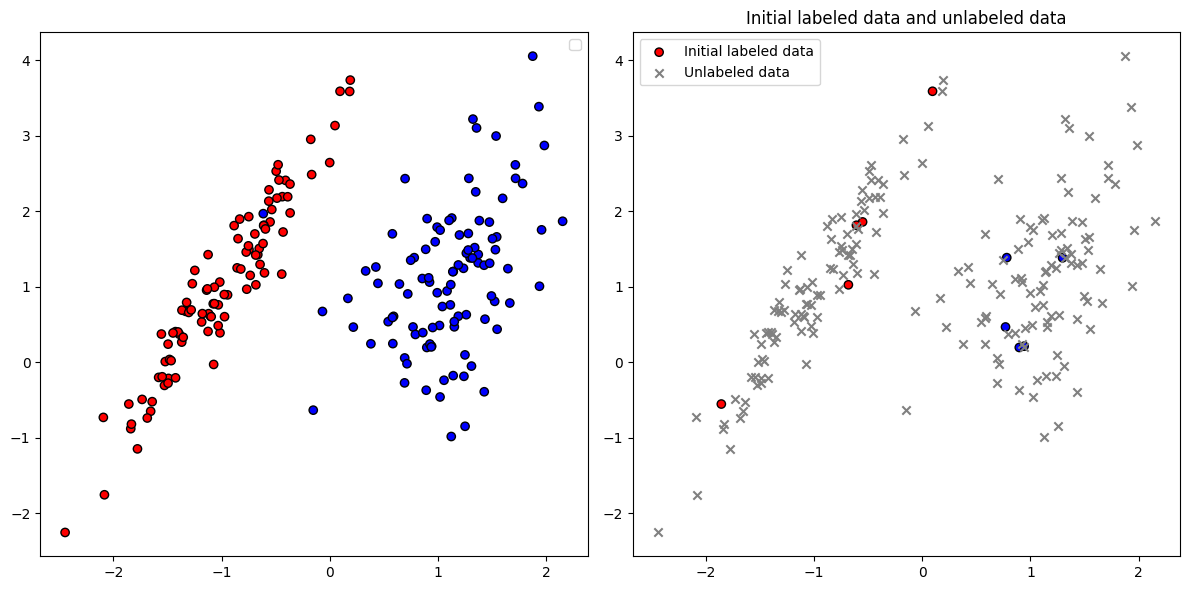

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2)
y = 2 * y - 1  # Convert labels from {0, 1} to {-1, 1}

# Split data into initial labeled set and unlabeled set
initial_size = 10
X_initial = X[:initial_size]
y_initial = y[:initial_size]
X_unlabeled = X[initial_size:]
y_unlabeled = y[initial_size:]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=100)

# Plot the truth data
ax1.scatter(X[:,0], X[:,1], c=y, cmap='bwr', marker='o', edgecolor='k')
ax1.legend()

# Plot the initial labeled data
ax2.scatter(X_initial[:, 0], X_initial[:, 1], c=y_initial, cmap='bwr', marker='o', edgecolor='k', label='Initial labeled data')
ax2.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='gray', marker='x', label='Unlabeled data')
ax2.legend()
ax2.set_title('Initial labeled data and unlabeled data')


# Display the plots
plt.tight_layout()
plt.show()



This code demonstrates the process of active learning by iteratively selecting the most uncertain samples, querying their labels, and adding them to the training set. The logistic regression model is retrained at each step, and the decision boundary is updated accordingly. By the end of the active learning process, the model achieves improved performance with fewer labeled samples compared to training on a fully labeled dataset from the start.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


# Function to compute uncertainty
def compute_uncertainty(clf, X):
    probs = clf.predict_proba(X)
    uncertainty = 1 - np.max(probs, axis=1)
    return uncertainty

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Initialize data
X_train = X_initial.copy()
y_train = y_initial.copy()

def update(frame):
    global X_train, y_train, X_unlabeled, y_unlabeled
    
    ax.clear()
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    if frame > 0:
        # Train logistic regression model
        clf = LogisticRegression(solver='liblinear')
        clf.fit(X_train, y_train)

        # Compute uncertainty for unlabeled data
        uncertainty = compute_uncertainty(clf, X_unlabeled)

        # Select the most uncertain sample
        query_idx = np.argmax(uncertainty)
        X_query = X_unlabeled[query_idx]
        y_query = y_unlabeled[query_idx]

        # Add the queried sample to the training set
        X_train = np.vstack([X_train, X_query])
        y_train = np.append(y_train, y_query)

        # Remove the queried sample from the unlabeled set
        X_unlabeled = np.delete(X_unlabeled, query_idx, axis=0)
        y_unlabeled = np.delete(y_unlabeled, query_idx)

        # Update decision boundary
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                             np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        # Plot decision boundary
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

        # Plot queried sample
        ax.scatter(X_query[0], X_query[1], c='yellow', marker='*', s=200, label='Queried sample')

    # Plot labeled and unlabeled data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', marker='o', edgecolor='k', label='Labeled data')
    ax.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='gray', marker='x', label='Unlabeled data')

    ax.legend()
    ax.set_title(f'Active Learning Process (Iteration {frame})')

# Create animation
n_frames = 11  # Initial state + 10 queries
anim = FuncAnimation(fig, update, frames=n_frames, repeat=False)

# Save animation as a gif
anim.save('active_learning_animation.gif', writer='pillow', fps=1)

plt.close(fig)

print("Animation saved as 'active_learning_animation.gif'")

Animation saved as 'active_learning_animation.gif'
